<h3><center>Data Preprocessing with Pandas
<p><b><center> Tahap 1

<b>Noted
* Data mentah (Raw Data) berisi informasi murid dalam kelas online, dengan menggunakan data (class_info.csv)
1. Bersihkan data dengan menghapus observasi yang tidak reliable.
2. Mengambil 10 murid yang masih aktif dengan nilai tertinggi, lalu meninjau ciri-cirinya. Apa sih insight yang diperoleh nantinya ?
________________________________________________________

<b> * Import Package *

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

<b> * Data Collection - Import data Ecel / CSV *

In [3]:
df = pd.read_csv('class_info.csv')

In [4]:
df

,id,name,age,city,province,active,class,last_exam_score,attendance_count,batch
0,1,Abdul,54.0,Samarinda,Kalimantan Timur,0.0,morning,59.0,6,1
1,2,Kurniawan,22.0,Bandung,Jawa Barat,1.0,afternoon,85.0,7,1
2,3,Ilham,29.0,Tasikmalaya,Jawa Barat,1.0,morning,52.0,6,1
3,4,Budi,57.0,Tanjungpinang,Kepulauan Riau,1.0,afternoon,70.0,6,1
4,5,Adi,35.0,Semarang,Jawa Tengah,0.0,afternoon,61.0,3,1
...,...,...,...,...,...,...,...,...,...,...
100,96,Yunus,50.0,Banjarmasin,Kalimantan Selatan,0.0,morning,66.0,6,1
101,97,Puji,34.0,Salatiga,Jawa Tengah,1.0,afternoon,64.0,5,1
102,98,Puput,24.0,Bogor,Jawa Barat,1.0,afternoon,67.0,4,1
103,99,Lukman,49.0,Banjarbaru,Kalimantan Selatan,0.0,morning,55.0,5,1


In [5]:
df.shape

(105, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                105 non-null    int64  
 1   name              105 non-null    object 
 2   age               103 non-null    float64
 3   city              105 non-null    object 
 4   province          101 non-null    object 
 5   active            104 non-null    float64
 6   class             103 non-null    object 
 7   last_exam_score   102 non-null    float64
 8   attendance_count  105 non-null    int64  
 9   batch             105 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 8.3+ KB


In [7]:
df.describe()

,id,age,active,last_exam_score,attendance_count,batch
count,105.000000,103.000000,104.000000,102.000000,105.000000,105.0
mean,51.523810,38.126214,0.634615,70.539216,5.247619,1.0
std,29.037143,13.397892,0.483870,12.668407,1.261722,0.0
min,1.000000,15.000000,0.000000,44.000000,2.000000,1.0
25%,27.000000,27.000000,0.000000,61.000000,4.000000,1.0
50%,51.000000,39.000000,1.000000,68.500000,5.000000,1.0
75%,76.000000,50.500000,1.000000,78.750000,6.000000,1.0
max,100.000000,59.000000,1.000000,100.000000,8.000000,1.0


In [8]:
df.isnull().sum()

id                  0
name                0
age                 2
city                0
province            4
active              1
class               2
last_exam_score     3
attendance_count    0
batch               0
dtype: int64

<b> Setelah data di croscek, ternyata data memiliki beberapa ke kotoran dari beberapa fitur

<h3><center>* Data Cleansing with Pandas * 
<b><p> Oke, langkah kita selanjutnya yaitu dengan :
<b><p> 1. Menghapus baris yang duplikat (Redundant)
<b><p> 2. Menghapus Baris dan Index tertentu
<b><p> 3. Menghapus baris yang memiliki nilai NaN (Kosong)

<b><center> Before
<b><p> Cleansing

In [10]:
#Menghapus baris yang duplikat (Redundant)
df = df.drop_duplicates()

In [11]:
df

,id,name,age,city,province,active,class,last_exam_score,attendance_count,batch
0,1,Abdul,54.0,Samarinda,Kalimantan Timur,0.0,morning,59.0,6,1
1,2,Kurniawan,22.0,Bandung,Jawa Barat,1.0,afternoon,85.0,7,1
2,3,Ilham,29.0,Tasikmalaya,Jawa Barat,1.0,morning,52.0,6,1
3,4,Budi,57.0,Tanjungpinang,Kepulauan Riau,1.0,afternoon,70.0,6,1
4,5,Adi,35.0,Semarang,Jawa Tengah,0.0,afternoon,61.0,3,1
...,...,...,...,...,...,...,...,...,...,...
98,96,Yunus,50.0,Banjarmasin,Kalimantan Selatan,0.0,morning,66.0,6,1
99,97,Puji,34.0,Salatiga,Jawa Tengah,1.0,afternoon,64.0,5,1
102,98,Puput,24.0,Bogor,Jawa Barat,1.0,afternoon,67.0,4,1
103,99,Lukman,49.0,Banjarbaru,Kalimantan Selatan,0.0,morning,55.0,5,1


In [12]:
#Menghapus Baris dengan Index tertentu
# Index 0 dan 1
df = df.drop(index = [0,1])

In [13]:
df

,id,name,age,city,province,active,class,last_exam_score,attendance_count,batch
2,3,Ilham,29.0,Tasikmalaya,Jawa Barat,1.0,morning,52.0,6,1
3,4,Budi,57.0,Tanjungpinang,Kepulauan Riau,1.0,afternoon,70.0,6,1
4,5,Adi,35.0,Semarang,Jawa Tengah,0.0,afternoon,61.0,3,1
5,6,Eko,28.0,Sukabumi,Jawa Barat,1.0,morning,78.0,4,1
6,7,Nurul,17.0,Kota Administrasi Jakarta Selatan,Jakarta,0.0,morning,79.0,5,1
...,...,...,...,...,...,...,...,...,...,...
98,96,Yunus,50.0,Banjarmasin,Kalimantan Selatan,0.0,morning,66.0,6,1
99,97,Puji,34.0,Salatiga,Jawa Tengah,1.0,afternoon,64.0,5,1
102,98,Puput,24.0,Bogor,Jawa Barat,1.0,afternoon,67.0,4,1
103,99,Lukman,49.0,Banjarbaru,Kalimantan Selatan,0.0,morning,55.0,5,1


In [14]:
#Menghapus baris yang memuat nilai Nilai NaN (Kosong)
df = df.dropna()

In [15]:
df

,id,name,age,city,province,active,class,last_exam_score,attendance_count,batch
2,3,Ilham,29.0,Tasikmalaya,Jawa Barat,1.0,morning,52.0,6,1
3,4,Budi,57.0,Tanjungpinang,Kepulauan Riau,1.0,afternoon,70.0,6,1
4,5,Adi,35.0,Semarang,Jawa Tengah,0.0,afternoon,61.0,3,1
5,6,Eko,28.0,Sukabumi,Jawa Barat,1.0,morning,78.0,4,1
6,7,Nurul,17.0,Kota Administrasi Jakarta Selatan,Jakarta,0.0,morning,79.0,5,1
...,...,...,...,...,...,...,...,...,...,...
98,96,Yunus,50.0,Banjarmasin,Kalimantan Selatan,0.0,morning,66.0,6,1
99,97,Puji,34.0,Salatiga,Jawa Tengah,1.0,afternoon,64.0,5,1
102,98,Puput,24.0,Bogor,Jawa Barat,1.0,afternoon,67.0,4,1
103,99,Lukman,49.0,Banjarbaru,Kalimantan Selatan,0.0,morning,55.0,5,1


<b> Preprocessing

<p><b>1. Mengambil satu atau beberapa kolom
<p><b>2. Mengambil beberapa baris dengan konsep filtering
<p><b>3. Mengurutkan berdasarkan kolom tertentu

In [19]:
#Mengambil beberapa kolom saja
df_filtered = df[['name','age','city','province','active','class','last_exam_score','attendance_count']]

In [20]:
df_filtered

,name,age,city,province,active,class,last_exam_score,attendance_count
2,Ilham,29.0,Tasikmalaya,Jawa Barat,1.0,morning,52.0,6
3,Budi,57.0,Tanjungpinang,Kepulauan Riau,1.0,afternoon,70.0,6
4,Adi,35.0,Semarang,Jawa Tengah,0.0,afternoon,61.0,3
5,Eko,28.0,Sukabumi,Jawa Barat,1.0,morning,78.0,4
6,Nurul,17.0,Kota Administrasi Jakarta Selatan,Jakarta,0.0,morning,79.0,5
...,...,...,...,...,...,...,...,...
98,Yunus,50.0,Banjarmasin,Kalimantan Selatan,0.0,morning,66.0,6
99,Puji,34.0,Salatiga,Jawa Tengah,1.0,afternoon,64.0,5
102,Puput,24.0,Bogor,Jawa Barat,1.0,afternoon,67.0,4
103,Lukman,49.0,Banjarbaru,Kalimantan Selatan,0.0,morning,55.0,5


In [21]:
#Mengambil beberapa baris berdasarkan filtering kondisi tertentu yakni 1 = active
df_active = df_filtered[df_filtered['active'] == 1]

In [22]:
df_active

,name,age,city,province,active,class,last_exam_score,attendance_count
2,Ilham,29.0,Tasikmalaya,Jawa Barat,1.0,morning,52.0,6
3,Budi,57.0,Tanjungpinang,Kepulauan Riau,1.0,afternoon,70.0,6
5,Eko,28.0,Sukabumi,Jawa Barat,1.0,morning,78.0,4
7,Putra,51.0,Palangkaraya,Kalimantan Tengah,1.0,morning,71.0,6
8,Nina,57.0,Tanjungpinang,Kepulauan Riau,1.0,morning,80.0,6
10,Ari,42.0,Malang,Jawa Timur,1.0,afternoon,82.0,5
11,Indra,33.0,Purwokerto,Jawa Tengah,1.0,afternoon,60.0,7
14,Maria,47.0,Pontianak,Kalimantan Barat,1.0,morning,71.0,5
16,Pratiwi,26.0,Cirebon,Jawa Barat,1.0,afternoon,76.0,5
18,Wulandari,52.0,Balikpapan,Kalimantan Timur,1.0,afternoon,83.0,6


In [32]:
#Mengambil beberapa baris berdasarkan filtering kondisi tertentu yakni 0 = non active
df_active = df_filtered[df_filtered['active'] == 0]

In [33]:
df_active

,name,age,city,province,active,class,last_exam_score,attendance_count
4,Adi,35.0,Semarang,Jawa Tengah,0.0,afternoon,61.0,3
6,Nurul,17.0,Kota Administrasi Jakarta Selatan,Jakarta,0.0,morning,79.0,5
9,Arif,56.0,Batam,Kepulauan Riau,0.0,afternoon,65.0,4
12,Dyah,24.0,Bogor,Jawa Barat,0.0,morning,66.0,6
13,Rizki,57.0,Tanjungpinang,Kepulauan Riau,0.0,afternoon,67.0,7
15,Ratih,19.0,Kota Administrasi Jakarta Utara,Jakarta,0.0,morning,81.0,6
19,Fajar,34.0,Salatiga,Jawa Tengah,0.0,afternoon,85.0,5
20,Bayu,39.0,Blitar,Jawa Timur,0.0,afternoon,89.0,6
22,Anita,50.0,Banjarmasin,Kalimantan Selatan,0.0,afternoon,59.0,5
23,Muhamad,40.0,Kediri,Jawa Timur,0.0,morning,100.0,8


In [28]:
#Mengurutkan data berdasarkan kolom tertentu dengan nilai tertinggi sampai nilai terendah
df_active_sorted = df_active.sort_values('last_exam_score', ascending = False)

In [29]:
df_active_sorted

,name,age,city,province,active,class,last_exam_score,attendance_count
25,Rahmawati,35.0,Semarang,Jawa Tengah,1.0,morning,100.0,8
26,Fitria,47.0,Pontianak,Kalimantan Barat,1.0,morning,89.0,6
35,Yunita,55.0,Tarakan,Kalimantan Utara,1.0,morning,89.0,7
64,Raden,17.0,Kota Administrasi Jakarta Selatan,Jakarta,1.0,afternoon,87.0,6
40,Diah,30.0,Banjar,Jawa Barat,1.0,afternoon,85.0,6
36,Rina,54.0,Samarinda,Kalimantan Timur,1.0,afternoon,84.0,6
18,Wulandari,52.0,Balikpapan,Kalimantan Timur,1.0,afternoon,83.0,6
10,Ari,42.0,Malang,Jawa Timur,1.0,afternoon,82.0,5
88,Hafizh,58.0,Bandar Lampung,Lampung,1.0,afternoon,82.0,6
43,Abdul,25.0,Cimahi,Jawa Barat,1.0,afternoon,81.0,6


In [30]:
#Mengambil nilai baris teratas
df_final = df_active_sorted.head(10)

In [31]:
df_final

,name,age,city,province,active,class,last_exam_score,attendance_count
25,Rahmawati,35.0,Semarang,Jawa Tengah,1.0,morning,100.0,8
26,Fitria,47.0,Pontianak,Kalimantan Barat,1.0,morning,89.0,6
35,Yunita,55.0,Tarakan,Kalimantan Utara,1.0,morning,89.0,7
64,Raden,17.0,Kota Administrasi Jakarta Selatan,Jakarta,1.0,afternoon,87.0,6
40,Diah,30.0,Banjar,Jawa Barat,1.0,afternoon,85.0,6
36,Rina,54.0,Samarinda,Kalimantan Timur,1.0,afternoon,84.0,6
18,Wulandari,52.0,Balikpapan,Kalimantan Timur,1.0,afternoon,83.0,6
10,Ari,42.0,Malang,Jawa Timur,1.0,afternoon,82.0,5
88,Hafizh,58.0,Bandar Lampung,Lampung,1.0,afternoon,82.0,6
43,Abdul,25.0,Cimahi,Jawa Barat,1.0,afternoon,81.0,6


<center><b>Kesimpulan insight yang dapat diambil
<p><b>1. Jumlah kehadiran siswa dapat mempengaaruhi nilai
<p>Terlihat bahwa semakin besar jumlah kehadiran, maka nilai juga cenderung semakin besar
<p><b>2. Nilai tertinggi pada kelas pagi lebih besar daripada nilai kelas siang
<p>Terlihat bahwa dari data tersebut nilai kelas pagi yang tertinggi adalah 100, sedangkan nilai tertinggi di kelas siang adalah 87
<p><b>3. Umur dan kota asal tidak mempengaruhi nilai
<p>Terlihat bahwa pada 10 nilai tertinggi, data umur dan kota juga tersebar atau bervariasi (tidak ada pola khusus) 

<p><b><center> Tahap 2
<p><b>Exploratory Data Analyst

In [35]:
df = pd.read_csv('class_info_cleansing_update.csv')
df["seq_number"]=df.index.values
df

,id,name,age,city,province,active,class,last_exam_score,attendance_count,batch,seq_number
0,3,Ilham,29,Tasikmalaya,Jawa Barat,1,morning,52,6,1,0
1,4,Budi,57,Tanjungpinang,Kepulauan Riau,1,afternoon,70,6,1,1
2,5,Adi,35,Semarang,Jawa Tengah,0,afternoon,61,3,1,2
3,6,Eko,28,Sukabumi,Jawa Barat,1,morning,78,4,1,3
4,7,Nurul,17,Kota Administrasi Jakarta Selatan,Jakarta,0,morning,79,5,1,4
...,...,...,...,...,...,...,...,...,...,...,...
87,96,Yunus,50,Banjarmasin,Kalimantan Selatan,0,morning,66,6,1,87
88,97,Puji,34,Salatiga,Jawa Tengah,1,afternoon,64,5,1,88
89,98,Puput,24,Bogor,Jawa Barat,1,afternoon,67,4,1,89
90,99,Lukman,49,Banjarbaru,Kalimantan Selatan,0,morning,55,5,1,90


In [37]:
df.describe()

,id,age,active,last_exam_score,attendance_count,batch,seq_number
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.0,92.00000
mean,51.065217,37.934783,0.652174,70.489130,5.271739,1.0,45.50000
std,28.558328,13.723970,0.478890,13.070808,1.284765,0.0,26.70206
min,3.000000,15.000000,0.000000,44.000000,2.000000,1.0,0.00000
25%,26.750000,26.000000,0.000000,60.000000,4.000000,1.0,22.75000
50%,50.500000,38.500000,1.000000,68.000000,5.000000,1.0,45.50000
75%,75.250000,51.000000,1.000000,79.250000,6.000000,1.0,68.25000
max,100.000000,59.000000,1.000000,100.000000,8.000000,1.0,91.00000


In [38]:
df.shape

(92, 11)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                92 non-null     int64 
 1   name              92 non-null     object
 2   age               92 non-null     int64 
 3   city              92 non-null     object
 4   province          92 non-null     object
 5   active            92 non-null     int64 
 6   class             92 non-null     object
 7   last_exam_score   92 non-null     int64 
 8   attendance_count  92 non-null     int64 
 9   batch             92 non-null     int64 
 10  seq_number        92 non-null     int64 
dtypes: int64(7), object(4)
memory usage: 8.0+ KB


<b>After

In [40]:
df.isnull().sum()

id                  0
name                0
age                 0
city                0
province            0
active              0
class               0
last_exam_score     0
attendance_count    0
batch               0
seq_number          0
dtype: int64

<b>Visualisasi Distribusi with Bar Histrogram 

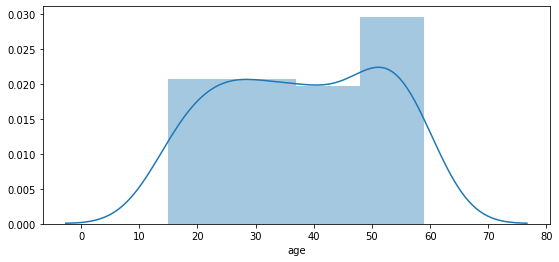

In [43]:
#Menampilkan grafik presentase sebaran fitur age
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['age'])

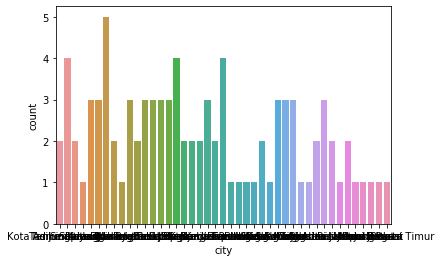

In [44]:
#Menampilkan grafik presentase terhadap fitur city
sns.countplot(df['city'])

In [45]:
df.city.value_counts()

Batam                                5
Tanjungpinang                        4
Depok                                4
Blitar                               4
Kota Administrasi Jakarta Pusat      3
Kota Administrasi Jakarta Selatan    3
Balikpapan                           3
Bogor                                3
Tegal                                3
Cirebon                              3
Kota Administrasi Jakarta Utara      3
Surabaya                             3
Banjarbaru                           3
Salatiga                             3
Palangkaraya                         3
Bontang                              3
Banjar                               2
Metro                                2
Kediri                               2
Malang                               2
Bandar Lampung                       2
Sungai Penuh                         2
Semarang                             2
Pontianak                            2
Cimahi                               2
Kota Administrasi Jakarta

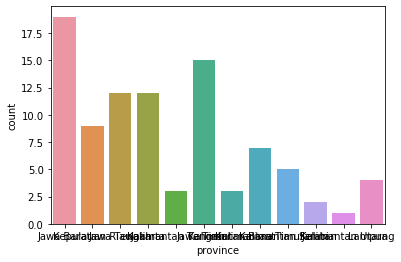

In [46]:
#Menampilkan grafik presentase dari fitur province
sns.countplot(df['province'])

In [47]:
df.province.value_counts()

Jawa Barat            19
Jawa Timur            15
Jakarta               12
Jawa Tengah           12
Kepulauan Riau         9
Kalimantan Timur       7
Kalimantan Selatan     5
Lampung                4
Kalimantan Barat       3
Kalimantan Tengah      3
Jambi                  2
Kalimantan Utara       1
Name: province, dtype: int64

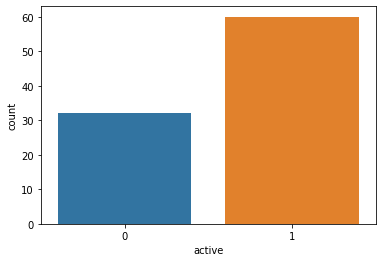

In [48]:
#Menampilkan grafik presentase fitur active (0= tidak active, 1=active)
sns.countplot(df['active'])

In [49]:
df.active.value_counts()

1    60
0    32
Name: active, dtype: int64

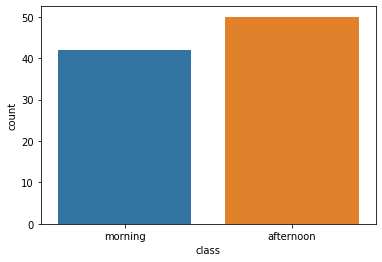

In [50]:
#Menampilkan grafik presentase dari fitur class
sns.countplot(df['class'])

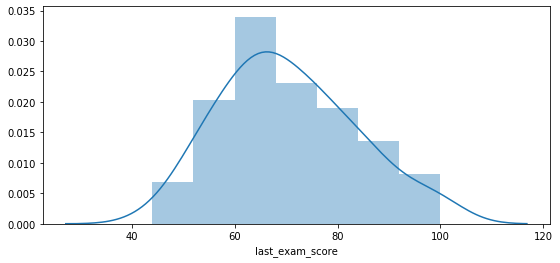

In [53]:
#Menampilkan grafik presentase sebaran dari fitur last_exam_score
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['last_exam_score'])

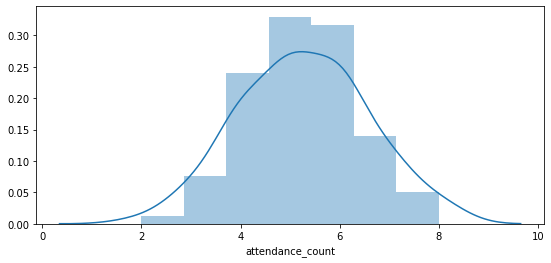

In [54]:
#Menampilkan grafik presentase sebaran dari fitur attendance_count
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['attendance_count'])

<b> Pie Chart

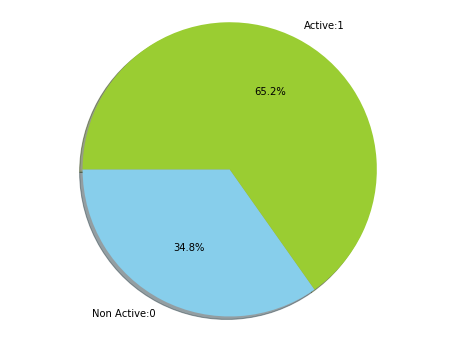

In [55]:
plt.figure(figsize=(8,6))

# Data to plot
labels = 'Non Active:0','Active:1'
sizes = [len(df[df['active'] == 0]),len(df[df['active'] == 1])]
colors = ['skyblue', 'yellowgreen']
explode = (0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

<b>Scatter plot
<p>Disini akan memvisualisasikan jenis data numerical

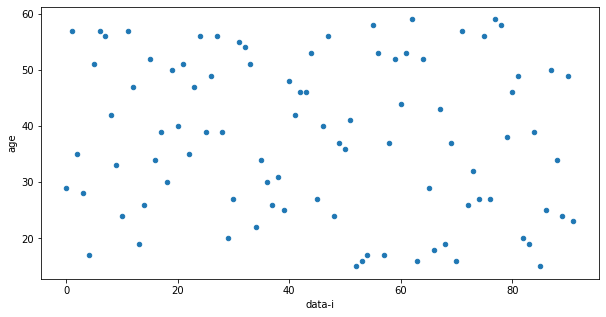

In [57]:
#Menampilkan grafik presentase sebaran data dari nilai pada fitur age
df_plot =pd.DataFrame ({'age': df['age'],
                       'data-i' : df["seq_number"]})
df_plot.plot.scatter(x='data-i', y='age', figsize=(10,5));

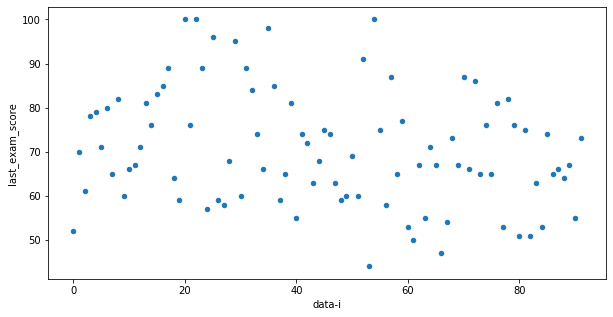

In [59]:
#Menampilkan grafik presentase sebaran data dari nilai pada fitur last_exam_score
df_plot =pd.DataFrame ({'last_exam_score': df['last_exam_score'],
                       'data-i' : df["seq_number"]})
df_plot.plot.scatter(x='data-i', y='last_exam_score', figsize=(10,5));

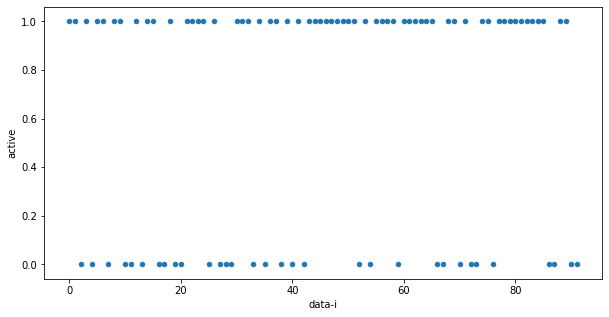

In [60]:
#Menampilkan grafik presentase sebaran data dari nilai pada fitur active
df_plot =pd.DataFrame ({'active': df['active'],
                       'data-i' : df["seq_number"]})
df_plot.plot.scatter(x='data-i', y='active', figsize=(10,5));

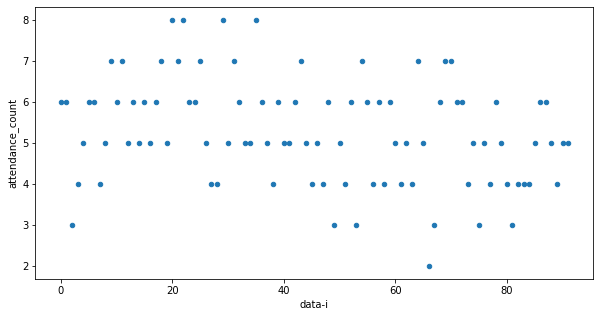

In [61]:
#Menampilkan grafik presentase sebaran data dari nilai pada fitur attendance_count
df_plot =pd.DataFrame ({'attendance_count': df['attendance_count'],
                       'data-i' : df["seq_number"]})
df_plot.plot.scatter(x='data-i', y='attendance_count', figsize=(10,5));

In [62]:
!pip install seaborn

<b>Box plot

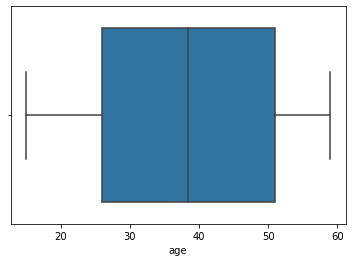

In [64]:
sns.boxplot(x=df['age'])

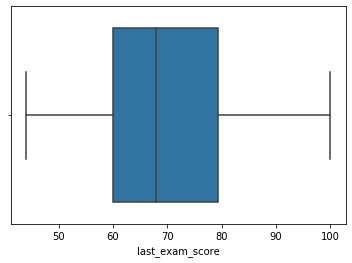

In [65]:
sns.boxplot(x=df['last_exam_score'])

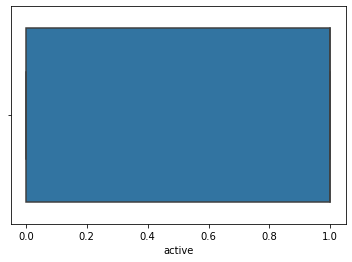

In [66]:
sns.boxplot(x=df['active'])

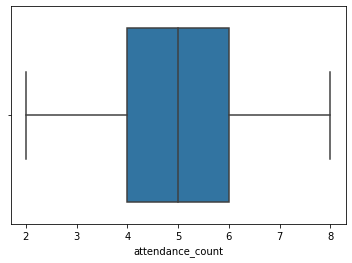

In [67]:
sns.boxplot(x=df['attendance_count'])

<center>

<b><center>Disclaimer !
<p> Materi yang saya dapatkan kali ini, dari salah satu acara workshop DataScience, kemudian saya explore lagi, saya gali lagi insightnya.